In [31]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.utils import py_random_state
from networkx.generators.random_graphs import _random_subset
import numpy as np
import random

from scipy.optimize import curve_fit

import time
import os

In [35]:
seed = np.random.RandomState()           
time_steps = int(1e4) 
t0 = time.time()

explorations_per_graph=100

def LinearSearch(lys, element):
    for i in range (len(lys)):
        if lys[i] == element:
            return i
    return -1

#definisco una funzione del grafo per poi fare la media tra grafi differenti

def time_nodes (G,explorations_per_graph):

        initial_node = _random_subset(len(G.nodes), 1, seed).pop()
       
    #dinamica di esplorazione: semplicemente riempio una lista dei nuovi nodi in cui va il walker. Linear search 
    #mi guarda se il nodo è gia presente e non lo aggiunge. Exploration fa un evoluzione temporale restituendo il nuovo nodo
    
        def exploration(initial_node, G, explored_nodes):
            if LinearSearch(explored_nodes, initial_node) < 0:
                   explored_nodes += [initial_node]
            neighbours = list(G[initial_node])
            new_node = _random_subset(neighbours, 1, seed).pop()
            return new_node

        exploration_time = []

        explored_nodes = []

    #ripeto l'esplorazione di "time_steps" passi temporali "exploration_per_graph" volte per fare una media - i tempi 
    #di esplorazione variano molto di volta in volta. Semplicemente ogni iterazione mi cambia il nodo iniziale con quello
    #nuovo chiamando la funzione esplorazione. Quando tutti i nodi sono esplorati salvo il tempo impiegato e svuoto il vettore
    #Infine faccio una media dei tempi.
    
        for i in range(explorations_per_graph):
             for t in range(time_steps):
                initial_node = exploration(initial_node, G, explored_nodes)
                if len(explored_nodes) == len(G.nodes):
                    exploration_time += [t]
                 #  print("All nodes explored in ", t , "steps")
                    explored_nodes.clear()
                    break 

        mean_exploration_time = sum(exploration_time)/explorations_per_graph
        print("mean_exploration_time: ", mean_exploration_time, len(G.nodes) ,"nodes")
        
        return mean_exploration_time
    
#print(exploration_time)
#print(explored_nodes) 
#print(len(explored_nodes),"Explored nodes")
     

print(f"done in {int((time.time()-t0)/60)} minutes and {((time.time()-t0)%60)} seconds")


done in 0 minutes and 0.0003001689910888672 seconds


mean_exploration_time:  112.8 20 nodes
mean_exploration_time:  373.3 70 nodes
mean_exploration_time:  709.85 120 nodes
mean_exploration_time:  986.13 170 nodes
mean_exploration_time:  1342.52 220 nodes
mean_exploration_time:  1774.72 270 nodes
mean_exploration_time:  2047.63 320 nodes
mean_exploration_time:  2491.56 370 nodes
mean_exploration_time:  2883.96 420 nodes
mean_exploration_time:  3285.02 470 nodes
mean_exploration_time:  3656.23 520 nodes
mean_exploration_time:  3861.41 570 nodes
mean_exploration_time:  4292.33 620 nodes
mean_exploration_time:  4783.0 670 nodes
mean_exploration_time:  5144.77 720 nodes
mean_exploration_time:  5630.8 770 nodes
mean_exploration_time:  6045.66 820 nodes
mean_exploration_time:  6459.26 870 nodes
mean_exploration_time:  6697.21 920 nodes
mean_exploration_time:  6682.55 970 nodes


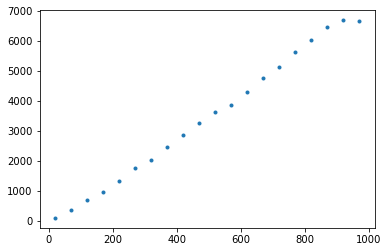

In [36]:
#random_graph

N = []
P = 0.25
Times = []

#vettore dei nodi dei diversi grafi
for i in range(20):
    N+= [20+i*50]    

#per ogni N creo un grafo e faccio una media dei tempi di esplorazione che plotto in funzione di N    
for i in range(len(N)):
    G = nx.erdos_renyi_graph(N[i], P)
    while min([d for n, d in G.degree()]) == 0:
          G = nx.erdos_renyi_graph(N[i], P)
    Times += [time_nodes(G,explorations_per_graph)]  

plt.plot(N, Times, '.', label = 'exploration_time')
    


mean_exploration_time:  112.06 20 nodes
mean_exploration_time:  262.27 30 nodes
mean_exploration_time:  349.05 40 nodes
mean_exploration_time:  390.87 50 nodes
mean_exploration_time:  521.19 60 nodes
mean_exploration_time:  630.88 70 nodes
mean_exploration_time:  735.92 80 nodes
mean_exploration_time:  904.17 90 nodes
mean_exploration_time:  1038.87 100 nodes
mean_exploration_time:  1118.37 110 nodes
mean_exploration_time:  1291.84 120 nodes
mean_exploration_time:  1336.01 130 nodes
mean_exploration_time:  1426.39 140 nodes
mean_exploration_time:  1686.52 150 nodes
mean_exploration_time:  1771.59 160 nodes
mean_exploration_time:  1843.69 170 nodes
mean_exploration_time:  2074.05 180 nodes
mean_exploration_time:  2221.34 190 nodes
mean_exploration_time:  2356.68 200 nodes
mean_exploration_time:  2474.68 210 nodes


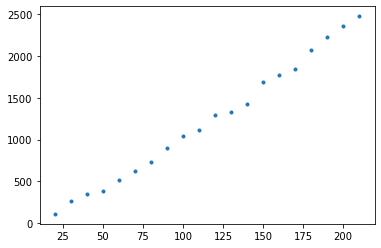

In [37]:
#scale-free-graph

N = []
M = 3
P = 0.25
Times = []

for i in range(20):
    N+= [20+i*10]    

for i in range(len(N)):
    G = nx.barabasi_albert_graph(N[i], M)
    Times += [time_nodes(G,explorations_per_graph)]  

plt.plot(N, Times, '.', label = 'exploration_time')
    